In [1]:
from pandas import read_csv
dataset = read_csv("../Dataset/cs_mitx.csv", encoding="ISO-8859-1")

In [2]:
forum=read_csv("../Dataset/course_posts.csv")

In [3]:
df=dataset[['viewed','Completed_or_Not','gender', 'grade', 'nevents', 'ndays_act', 'nplay_video', 'nchapters' ,'age']]

In [4]:
# for normalizing grades and gender missing values
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


df[['grade']] = DataFrameImputer().fit_transform(df[['grade']])
df[['gender']]= DataFrameImputer().fit_transform(df[['gender']])
#df[['last_event_DI']]= DataFrameImputer().fit_transform(df[['last_event_DI']])


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5]:
df.isnull().sum()

viewed              0
Completed_or_Not    0
gender              0
grade               0
nevents             0
ndays_act           0
nplay_video         0
nchapters           0
age                 0
dtype: int64

In [6]:
df.head()

,viewed,Completed_or_Not,gender,grade,nevents,ndays_act,nplay_video,nchapters,age
0,1,0,m,0.00,43,1,4,3,26
1,0,0,f,0.00,0,0,197757,0,23
2,1,0,m,0.01,879,5,212,3,18
3,1,0,m,0.00,547,8,32,2,29
4,0,0,m,0.00,2,1,197757,0,19


In [7]:
#One-hot encoding for converting gender m/f to 0/1
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = df[['gender']]
values = array(data)
print(values)
values.ravel()
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
integer_encoded = integer_encoded.reshape((integer_encoded.shape[0], 1))
df[['gender']]=integer_encoded
print(integer_encoded)

[['m']
 ['f']
 ['m']
 ...
 ['m']
 ['m']
 ['m']]
[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s

In [8]:
df1=forum[['votes','num_words']]
df1=df1[0:59279]
df1
df=pd.concat([df,df1], axis=1)

In [9]:
df.head()

,viewed,Completed_or_Not,gender,grade,nevents,ndays_act,nplay_video,nchapters,age,votes,num_words
0,1,0,1,0.00,43,1,4,3,26,2,23
1,0,0,0,0.00,0,0,197757,0,23,0,15
2,1,0,1,0.01,879,5,212,3,18,1,9
3,1,0,1,0.00,547,8,32,2,29,0,2
4,0,0,1,0.00,2,1,197757,0,19,0,31


In [10]:
df['Completed_or_Not'].value_counts()

0    57539
1     1740
Name: Completed_or_Not, dtype: int64

In [11]:
X=df.iloc[:,[0,2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,1]

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Completed_or_Not, dtype: int64

In [12]:
y.unique()
X=X.values
type(X)

numpy.ndarray

In [13]:
all_classes=['Not Completed','Completed']

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import itertools
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


In [15]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




AUC: 0.887
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11491
           1       0.80      0.78      0.79       365

   micro avg       0.99      0.99      0.99     11856
   macro avg       0.90      0.89      0.89     11856
weighted avg       0.99      0.99      0.99     11856

0.9872638326585695
RMS Error 0.0127361673414305


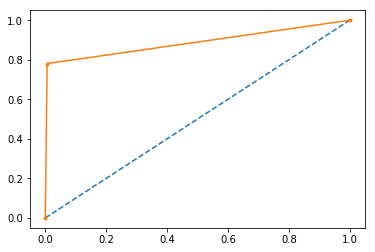

Confusion matrix, without normalization
[[11420    71]
 [   80   285]]


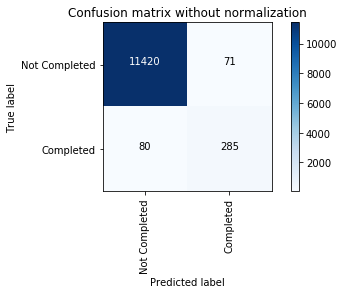

In [22]:
#Support vector machine
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20)
from sklearn import svm
clf = svm.SVC(C=0.5, gamma='scale')
clf.fit(X_train, y_train)  
predictions=clf.predict(X_test)

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
    

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print("RMS Error {}".format(mean_squared_error(y_test, predictions, multioutput = 'uniform_average')))
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='.')
# show the plot
pyplot.show()

cnf_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')

AUC: 0.892
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11491
           1       0.86      0.79      0.82       365

   micro avg       0.99      0.99      0.99     11856
   macro avg       0.93      0.89      0.91     11856
weighted avg       0.99      0.99      0.99     11856

0.9894568151147098
RMS Error 0.010543184885290149


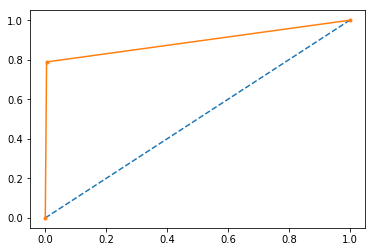

Confusion matrix, without normalization
[[11443    48]
 [   77   288]]


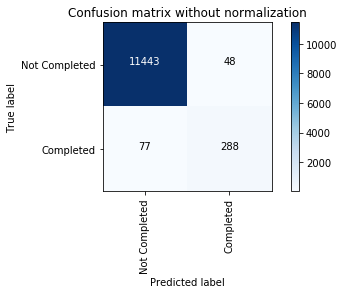

In [23]:
#Multi layer Perceptron

mlp = MLPClassifier(hidden_layer_sizes=(3, 15, 10), max_iter=1000)  


mlp.fit(X_train, y_train.values.ravel()) 
predictions = mlp.predict(X_test)    
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
    

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print("RMS Error {}".format(mean_squared_error(y_test, predictions, multioutput = 'uniform_average')))
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='.')
# show the plot
pyplot.show()

cnf_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')